# WQD7005 - Data Mining - 2018/2019 Semester 2
## Milestone 3 - Processing of Data - Co-Variance of the Stocks

**Team Members:**
    1. WQD180015 Ahmad Nazrin Zainal Abidin
    2. WQD180018 Faizal Samiron
    3. WQD180031 Zulkanain Hasan
    4. WQD180042 Muhammad Aiman Khalid

In this Milestone 3, we will process our previous collected data for KLSE Stock Market and conduct Co-variance analysis in order to search for a pattern in between daily price movement.

In [2]:
#import related package
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

To ensure the program run properly, we need to put the script and csv files in the same folder.

In [3]:
# get current working directory
import os
os.getcwd()

'/home/dsuser'

Firstly, we need import data file "Volume.csv" in order to select which stock counters mostly active by having high volume transactions per day.

In [4]:
# import klse data market(volume for each counter)
volume = pd.read_csv('Volume.csv')

We need to create the dates becoming index for sorting puposes.

In [5]:
# make the dates as index
volume = volume.set_index(pd.to_datetime(volume['Dates']), inplace = False, drop = True)
volume = volume.drop('Dates', axis = 1)
volume.head()

,KOTRA,WILLOW,GHLSYS,DIGISTA,RGB,PANPAGE,MTRONIC,OCNCASH,CUSCAPI,KARYON,...,BERTAM,SAM,SUIWAH,PRESTAR,LSTEEL,BRIGHT,REX,RGTBHD,GMUTUAL,PENSONI
Dates,,,,,,,,,,,,,,,,,,,,,
2017-12-01,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2017-12-04,0,112100,1058600,425200,24447500,435700,0,296400,5104100,715500,...,0,14400,0,379100,1154700,300100,5500,160100,12200,45500
2017-12-05,11200,78600,740700,1081100,18694700,140000,4335600,1251400,3300300,1485900,...,0,14300,2900,1111900,2609600,22200,29000,27900,22000,129800
2017-12-06,10400,81400,2200700,490000,3022900,167000,3622100,1858500,4638000,275000,...,27500,17700,0,544600,1628700,226900,6000,345000,33200,118900
2017-12-07,0,40200,2759000,94000,5384900,2571800,476100,608900,3855700,388000,...,0,6300,0,149400,344600,477800,23400,61000,0,37600


Notes: 1st of December 2017 is Public Holiday in Malaysia.

In this analysis, we already filtered only 778 stock counters in KLSE for further analysis because some other counters are either suspended or put on-hold for stock transaction.

Then, we find the mean from the total volume transactions and check which stock counters have volume above the average  to be taken for covariance analysis.

In [17]:
#since we have 778 counter in klse
#we decide to filter it out by looking at the mean volume, 
#if the mean volume of each counter is below total volume, we drop
#as result we get 133 counter

volume.describe()
volume.mean().describe()


count    7.640000e+02
mean     1.414910e+06
std      4.537288e+06
min      0.000000e+00
25%      3.337619e+04
50%      1.979286e+05
75%      7.641524e+05
max      7.301141e+07
dtype: float64

In [24]:
#to check how many counters that the volume is above the mean
mean = volume.mean()
meandf = pd.DataFrame(mean)
meandf[meandf[0] > 1.414910e+06].head()
print(f"Number of Stock Counters have Volume above Average are", len(meandf[meandf[0] > 1.414910e+06]), "Counters")


Number of Stock Counters have Volume above Average are 133 Counters


We store the selected stock counters name as a List of Active Counters

In [9]:
#store the counter name as list_active_counter
counter = meandf[meandf[0] > 1.414910e+06]
counter['countername'] = counter.index
list_active_counter = counter['countername'].tolist()


/home/dsuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Next, we import stock counter data file "ADJ_CLOSE.csv" which have all the information about Adjusted Closed Price and matched it with List of Active Counter to filter out the necessary price information.

In [10]:
#import adj_close klse data 
df = pd.read_csv('ADJ_CLOSE.csv')

In [11]:
#make the dates as index
df2 = df.set_index(pd.to_datetime(df['Dates']), inplace = False, drop = True)
df2 = df2.drop('Dates', axis = 1)

From Adjusted Close Price, we will calculate and create new column for **"Price Change"** on daily price compare to previous day. This will be the basis to check the co-variance between stock counter.

In [12]:
#calculate change of adj_close daily (new day-previous day), '-' sign counter loss, '+' counter gain
d_returns = df2.pct_change()  

In [13]:
#filter only for active counter(133 counters)
activecounter = d_returns[list_active_counter]

Later, we construct Covariance Matrix for Daily Portfolio Return

In [14]:
# Construct a covariance matrix for the portfolio's daily returns with the .cov() method
cov_matrix_c = activecounter.cov()
cov_matrix_c.head()

,RGB,MTRONIC,CUSCAPI,GPACKET,NOTION,DAYA,TRIVE,FRONTKN,MYEG,KEYASIC,...,BARAKAH,DIALOG,DATAPRP,SALCON,SPSETIA,PMETAL,EKOVEST,ANZO,HWGB,WCT
RGB,0.003065,-0.105430,0.015144,-0.004733,-0.028113,-0.635525,-0.070304,0.017230,0.083304,-0.017128,...,-0.019067,0.017304,-0.032749,-0.023235,0.077454,0.043102,0.020691,-0.098762,0.000193,0.015027
MTRONIC,-0.105430,8.813596,-0.471854,0.231342,2.049275,56.096696,5.774256,-0.512792,-1.327095,1.145878,...,1.278363,-0.522338,2.437270,1.601195,-1.270975,-0.893358,-0.579537,8.243530,-0.005975,-0.473560
CUSCAPI,0.015144,-0.471854,0.095037,-0.026735,-0.141346,-2.713375,-0.323485,0.107938,0.586430,-0.091519,...,-0.097507,0.112813,-0.161905,-0.116849,0.543767,0.296100,0.135832,-0.443534,0.000502,0.096123
GPACKET,-0.004733,0.231342,-0.026735,0.010203,0.060631,1.411586,0.153621,-0.029858,-0.141742,0.036759,...,0.039310,-0.031240,0.070748,0.048561,-0.132151,-0.075005,-0.036892,0.216701,-0.000222,-0.027358
NOTION,-0.028113,2.049275,-0.141346,0.060631,0.493681,12.904991,1.351849,-0.155628,-0.550472,0.281796,...,0.310803,-0.161321,0.582442,0.387016,-0.519086,-0.324509,-0.183809,1.918110,-0.001072,-0.143362


To further have clearer picture, we contruct the graph Covariance Matrix for all Stock Counters

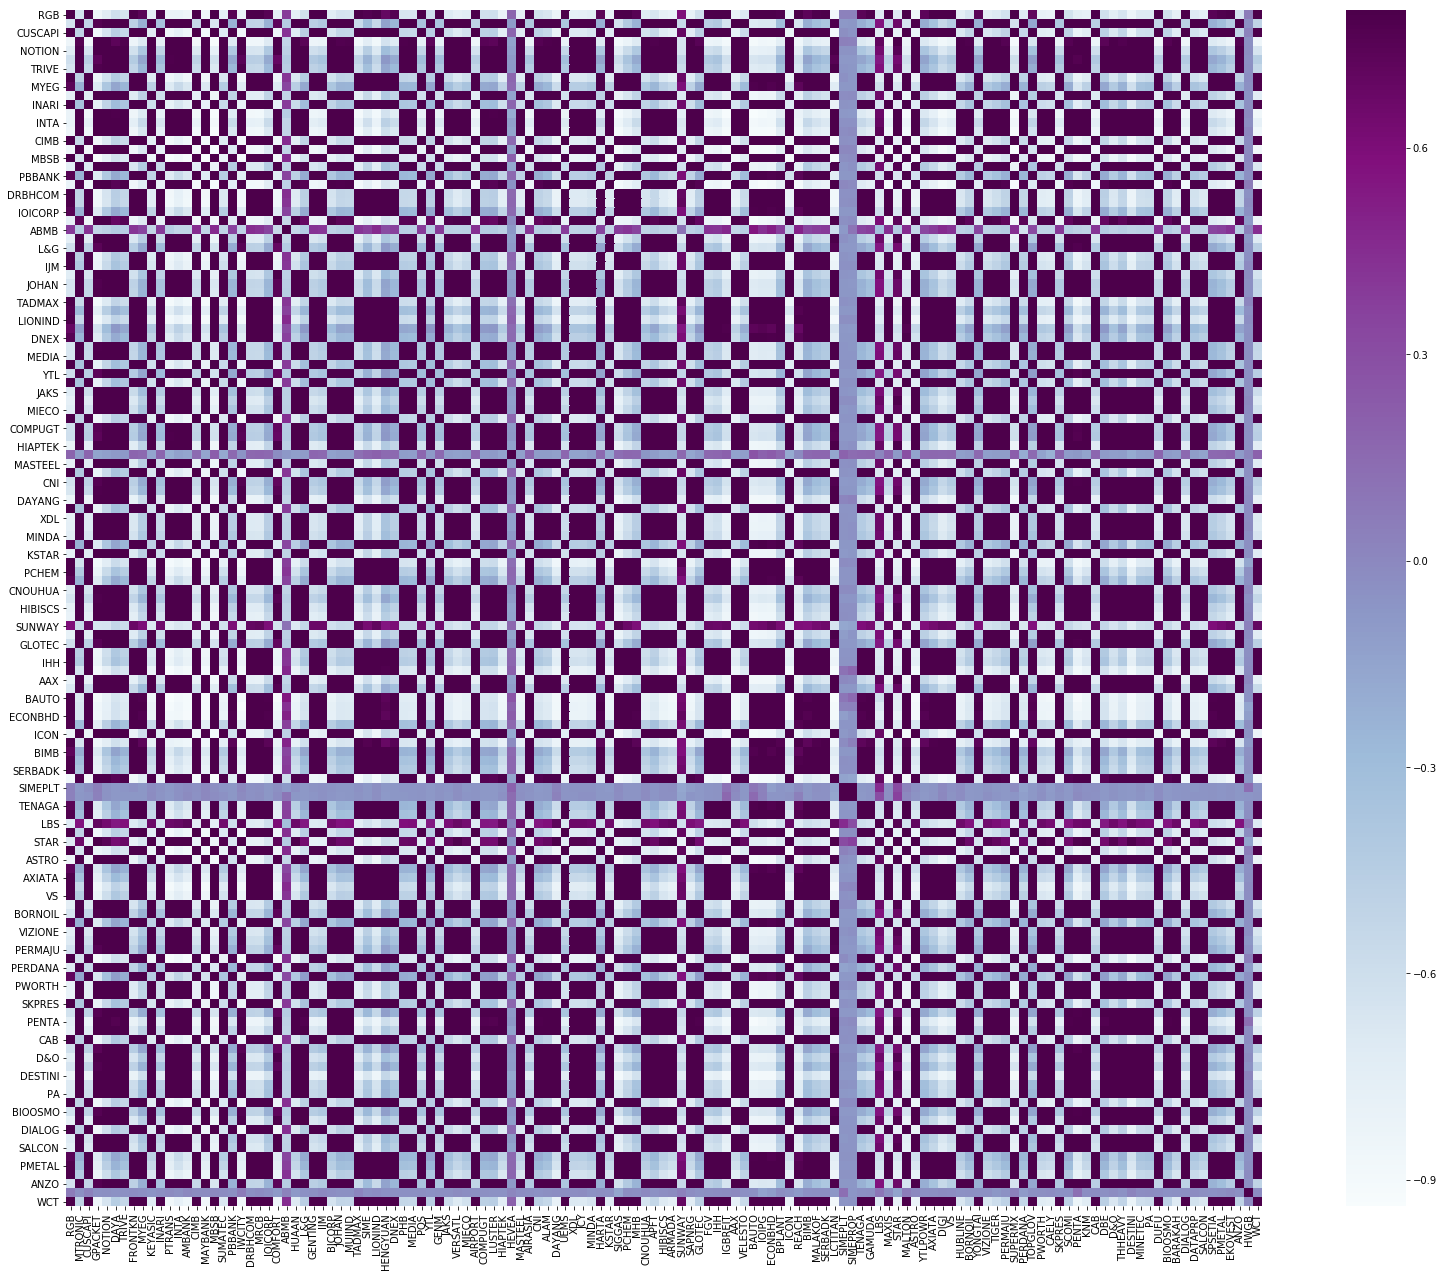

In [15]:
#construct the graph
matrix = activecounter.corr()
f, ax = plt.subplots(figsize = (30,22))
sns.heatmap(matrix,vmax = .8, square = True, cmap = "BuPu")

**Conclusion**

From here, we have better picture on performance of certain Stock Counters compare to others and find the relations between them in term of price movement with their respective sector.

For example, stock counter for **'RGB'** have high covariance with stock counter **'WCT'** because they are both in the same industry which is steel manufacturing. 

However, **'RGB'** is not affected much with **'BIOOSMO'** price movement because **'BIOOSMO'** is manufacturer of water bottle.

If we further study the graph, we can find certain stock counter can be a key player or market mover to the other stock counters within the same sector.
